In [2]:
from pprint import pprint 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import praw

In [3]:
user_agent = "Scrapper 0.1 by Jan" 
reddit = praw.Reddit(
    client_id = "YOUR_APP_ID",
    client_secret = "YOUR_APP_SECRET_ID",
    user_agent = user_agent
)

In [7]:
headlines = set()
for submission in reddit.subreddit('politics').hot(limit=None):
    headlines.add(submission.title)
    #print(submission.title)
    #print(submission.id)
    #print(submission.author)
    #print(submission.created_utc)
    #print(submission.score)
    #print(submission.upvote_ratio)
    #print(submission.url)
    #break 
    
print(len(headlines))

727


In [17]:
df = pd.DataFrame(headlines)
df.head() 
df.to_csv('headlines.csv',header=False,encoding='utf-8',index=False)

In [18]:
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
#df.head()
for line in headlines: 
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line 
    results.append(pol_score)
#pprint(results[:3],width=100)

In [26]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.306,0.694,0.000,-0.6486,Report: Feds Plan To Indict Chauvin And Other ...
1,0.283,0.566,0.151,-0.2732,Tennessee Republicans revive bill offering imm...
2,0.000,0.820,0.180,0.2960,Jamaal Bowman Explains How Progressives Will M...
3,0.192,0.808,0.000,-0.4215,Congress’ biggest ‘pedophile’ hunter is teamin...
4,0.106,0.894,0.000,-0.2263,The ‘Mississippi Plan’ to keep Blacks from vot...


In [30]:
df['label'] = 0
#df.head()
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
#df.head()

In [31]:
df2 = df[['headline','label']]
df2.to_csv('reddit_headlines_labels.csv',encoding='utf-8',index=False)

In [32]:
df.label.value_counts(normalize=True) * 100

 0    40.027510
-1    36.863824
 1    23.108666
Name: label, dtype: float64

In [34]:
print("Positive headlines:\n")
pprint(list(df[df['label'] ==1].headline)[:5],width=200)
print("\nNegative headlines:\n")
pprint(list(df[df['label'] ==-1].headline)[:5],width=200)


Positive headlines:

['Jamaal Bowman Explains How Progressives Will Make Biden’s Presidency Even Bolder',
 "Fox News's Chris Wallace praises Biden speech",
 "Joe Biden is proving progressives wrong. And they're loving it.",
 'Biden restores presidential consultations that Trump dismissed',
 'Florida Republicans Just Passed a Georgia-Style Voter Suppression Bill | The Florida GOP loved mail voting—until Democrats started using it more']

Negative headlines:

['Report: Feds Plan To Indict Chauvin And Other Officers On Civil Rights Violation Charges',
 'Tennessee Republicans revive bill offering immunity for running over protesters blocking streets',
 'Congress’ biggest ‘pedophile’ hunter is teaming up with Matt Gaetz, who faces underage sex accusation — Strange bedfellows, indeed.',
 'The ‘Mississippi Plan’ to keep Blacks from voting in 1890: ‘We came here to exclude the Negro’',
 'State Rep. Bryan Posthumus arrested on suspicion of drunk driving after rollover crash']


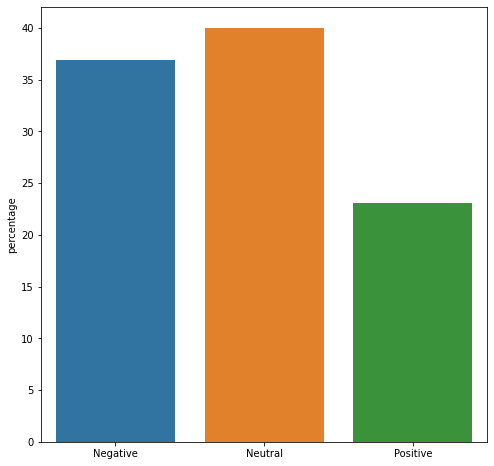

In [36]:
fix, ax = plt.subplots(figsize=(8,8))
counts = df.label.value_counts(normalize=True) * 100 
sns.barplot(x=counts.index, y=counts,ax=ax)
ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel("percentage")
plt.show()